<a href="https://colab.research.google.com/github/Vikrampothireedy/SQL/blob/main/Health_Care_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None

Missing Values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
a

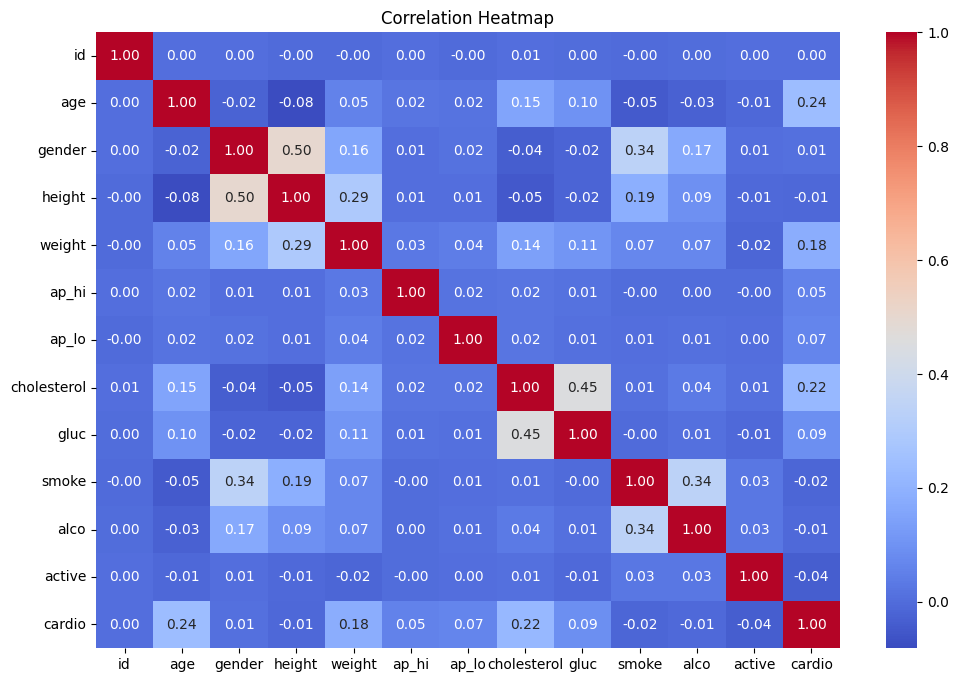

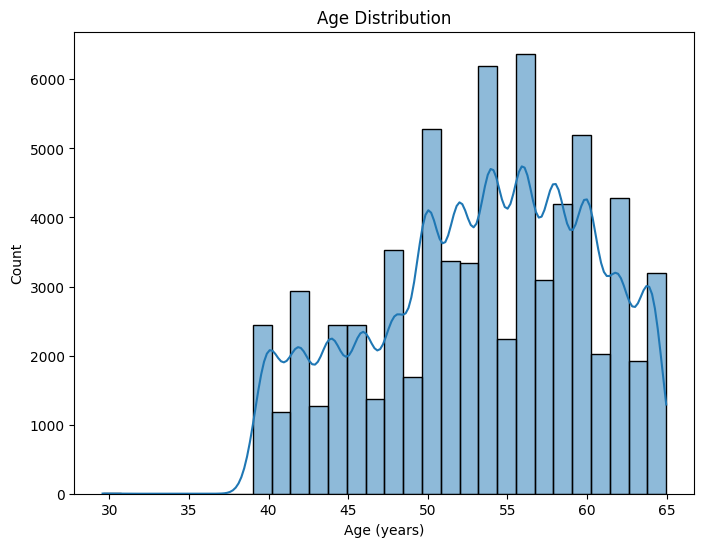

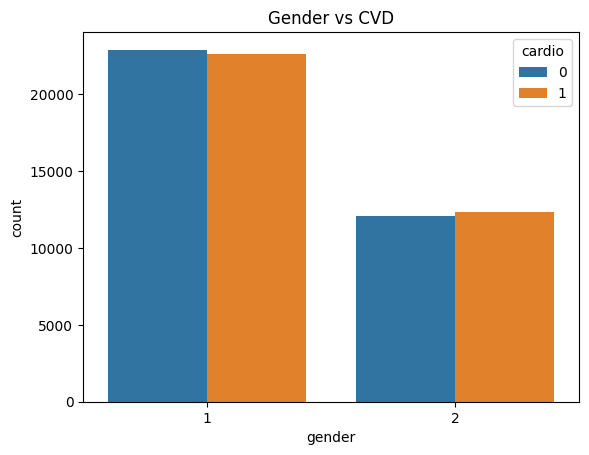

Chi-Square Test: chi2=16.677916738748436, p-value=4.4293623605077656e-05
T-Test: t-statistic=59.99467590467842, p-value=0.0
Explained Variance Ratio: [0.22571418 0.18293082 0.14511443 0.14055713 0.13324356]

Logistic Regression Metrics:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000


Random Forest Metrics:
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6988
           1       0.71      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000

Cross-Validation Scores: [0.70121429 0.70978571 0.70557143 0.70885714 0.70292857]
Mea

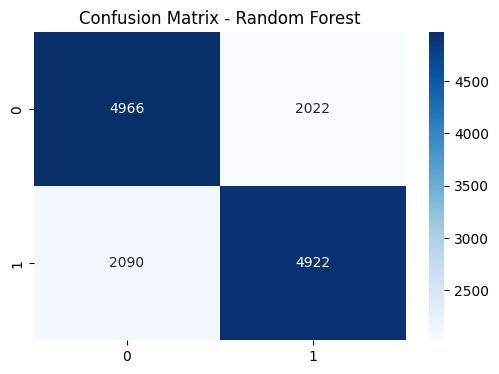

Analysis Complete!


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = "/content/Health_Care _cardio_dataset.csv"
df = pd.read_csv(file_path)

# Display dataset information
def data_summary(df):
    print("Dataset Summary:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nClass Distribution:")
    print(df['cardio'].value_counts(normalize=True))
    print("\nGender Distribution:")
    print(df['gender'].value_counts(normalize=True))

data_summary(df)

# Data Cleaning (No missing values, so skipping imputation)
# Checking for duplicates
df = df.drop_duplicates()

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 6))
sns.histplot(df['age'] / 365, bins=30, kde=True)
plt.xlabel("Age (years)")
plt.title("Age Distribution")
plt.show()

# Gender-based CVD distribution
sns.countplot(x='gender', hue='cardio', data=df)
plt.title("Gender vs CVD")
plt.show()

# Statistical Analysis
# Chi-Square Test for categorical variables
contingency_table = pd.crosstab(df['smoke'], df['cardio'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2={chi2}, p-value={p}")

# T-Test for cholesterol levels
chol_cvd = df[df['cardio'] == 1]['cholesterol']
chol_non_cvd = df[df['cardio'] == 0]['cholesterol']
t_stat, p_val = ttest_ind(chol_cvd, chol_non_cvd)
print(f"T-Test: t-statistic={t_stat}, p-value={p_val}")

# Feature Selection using PCA
features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
X = df[features]
y = df['cardio']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Model Training
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("\nLogistic Regression Metrics:")
print(classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Metrics:")
print(classification_report(y_test, y_pred_rf))

# Cross-Validation
cv_scores = cross_val_score(rf_model, X_pca, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

print("Analysis Complete!")
